In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import models

In [54]:
# Carrega os dados, ignorando a primeira linha
dados_normalizados = 'Dados_Normalizados.csv'
dados_extraidos_geral = 'dados_extraidos_geral.csv'
ordem = 3

df = pd.read_csv(f'{models.path_dados_tratados}/ordens_{ordem}/{dados_normalizados}', header=0)
df = pd.DataFrame(df)[models.colunas]

df['sensor'] = df['sensor'].replace(models.sensores)

# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [55]:
# Treina o classificador
clf = DecisionTreeClassifier()
metodo = 'DecisionTree'
# clf = svm.SVC()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)


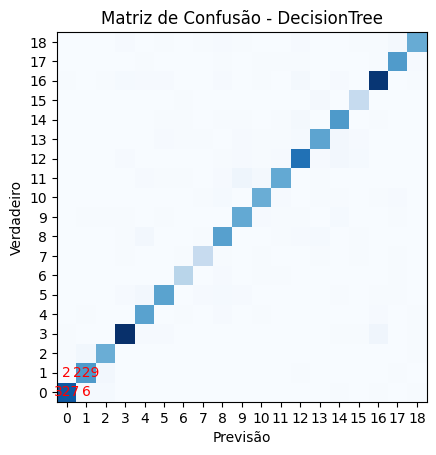

A precisão do classificador é: 90.3 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.98      0.95      0.96       345
               ball_fault_baixo       0.91      0.93      0.92       245
               ball_fault_medio       0.91      0.92      0.92       212
                cage_fault_alto       0.94      0.92      0.93       421
               cage_fault_baixo       0.86      0.93      0.90       231
               cage_fault_medio       0.91      0.86      0.89       247
 desalinhamento_horizontal_alto       0.90      0.92      0.91       123
desalinhamento_horizontal_baixo       0.89      0.87      0.88       109
desalinhamento_horizontal_médio       0.84      0.89      0.87       246
   desalinhamento_vertical_alto       0.86      0.89      0.87       227
  desalinhamento_vertical_baixo       0.88      0.90      0.89       218
  desalinhamento_vertical_médio       0.91      0.84    

In [56]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),1),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Separar as features (X) da coluna "defeito" (y)
X = df.drop("defeito", axis=1)
y = df["defeito"]

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)
metodo = 'KNeighbors'
knn.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", np.round(100*accuracy,2),'%')


Acurácia: 87.44 %


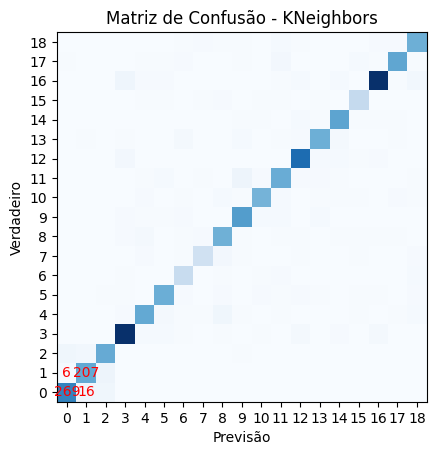

A precisão do classificador é: 87.44 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.92      0.90      0.91       299
               ball_fault_baixo       0.87      0.89      0.88       233
               ball_fault_medio       0.85      0.88      0.86       233
                cage_fault_alto       0.90      0.91      0.90       436
               cage_fault_baixo       0.86      0.83      0.84       252
               cage_fault_medio       0.87      0.86      0.86       230
 desalinhamento_horizontal_alto       0.75      0.85      0.80       110
desalinhamento_horizontal_baixo       0.85      0.75      0.80       105
desalinhamento_horizontal_médio       0.82      0.86      0.84       227
   desalinhamento_vertical_alto       0.84      0.88      0.86       258
  desalinhamento_vertical_baixo       0.90      0.86      0.88       221
  desalinhamento_vertical_médio       0.82      0.81   

In [58]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),2),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [61]:
from sklearn.svm import NuSVC
from sklearn.metrics import classification_report

# Dividir o dataset em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Treinar o classificador NuSVC
clf = NuSVC()
metodo = 'NuSVC'
clf.fit(X_train, y_train)

# Realizar as previsões
y_pred = clf.predict(X_test)

# Mostrar os resultados
print(classification_report(y_test, y_pred))

ValueError: specified nu is infeasible

In [ ]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),2),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))